In [73]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT

files=[
    # "prod_gen_g4_DetSim-20230328T134514_Reco1-20230328T134622.root",
    # "prod_gen_g4_DetSim-20230328T132319_Reco1-20230328T132428.root",
    "prod_gen_g4_DetSim-20230328T140344_Reco1-20230328T140454.root",
    "prod_gen_g4_DetSim-20230328T145841_Reco1-20230328T145947.root"
]

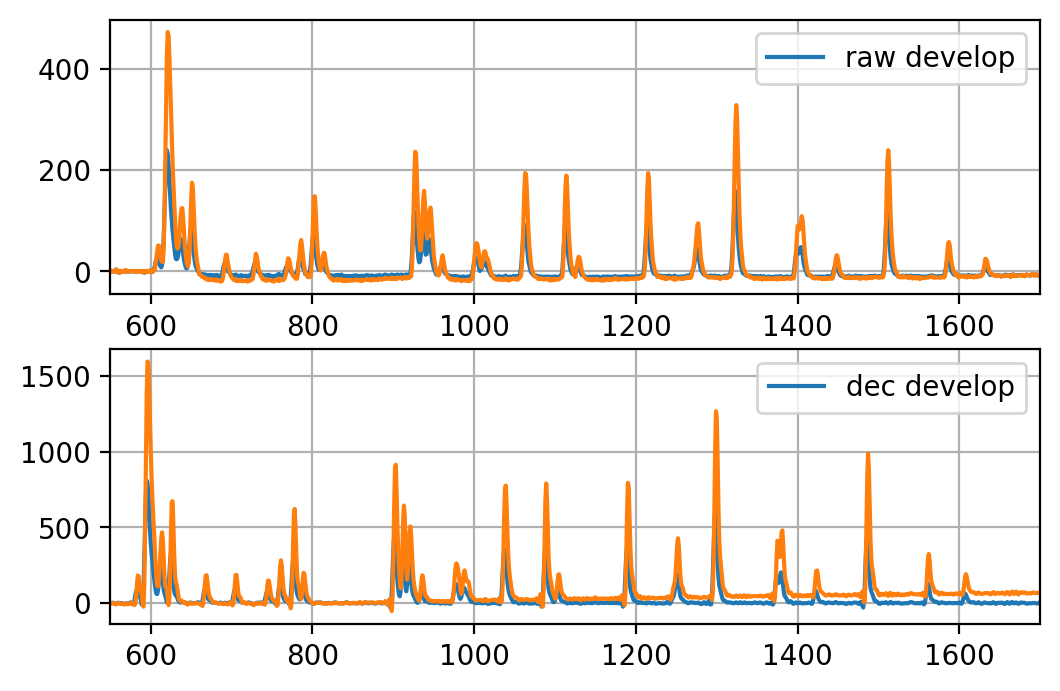

In [75]:
fig, axs = plt.subplots(2,dpi=200)

for file_path in files:

    file=ROOT.TFile.Open(file_path)
    tree = file.Get("Events")
    opdet_waveform=ROOT.vector("short")

    reader=ROOT.TTreeReader(tree)
    deco_waveform_branch=ROOT.TTreeReaderArray[ROOT.vector("short")](reader,"raw::OpDetWaveforms_opdecopmt__Reco1.obj.vector<short>")
    raw_waveform_branch=ROOT.TTreeReaderArray[ROOT.vector("short")](reader,"raw::OpDetWaveforms_opdaq__DetSim.obj.vector<short>")

    aux_deco=[]
    aux_raw=[]

    while reader.Next():
        opdet_waveform=deco_waveform_branch
        nwvs=opdet_waveform.GetSize()
        
        for i in range(nwvs):
            aux_deco.append(np.array(opdet_waveform[i]))
        opdet_waveform=raw_waveform_branch
        nwvs=opdet_waveform.GetSize()
        for i in range(nwvs):
            aux_raw.append(np.array(opdet_waveform[i]))
            
    # tree.Print()
    file.Close()

    axs[0].plot((aux_raw[6]-8000)*-1)
    axs[1].plot(aux_deco[0]-np.mean(aux_deco[0][:100]))
    # axs[0].legend(["raw linear","raw cubic"])
    # axs[1].legend(["dec linear","dec cubic"])
    axs[0].legend(["raw develop"])
    axs[1].legend(["dec develop"])
axs[0].set_xlim(550,1700)
axs[1].set_xlim(550,1700)
axs[0].grid()
axs[1].grid()
